[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MBanuelos/grad-numerical/blob/main/week5.ipynb)

# Week 5 - Integration

In [1]:
import numpy as np
import plotly.graph_objects as go
import scipy.misc
import scipy.integrate

## Integration

**Practice**

Write code to approximate an integral with Riemann sums. You should ALWAYS start by writing pseudo-code as comments in your function. Your Python function should accept a Python Function, a lower bound, an upper bound, the number of subintervals. Test your code on several functions for which you know the integral. You should write your code without any loops.

We need:
* step size - $\Delta x = h$
* $f(x)$
* we need the bounds $a,b$
* for Left-aligned R.S., we need the function values at the 'left' points in the interval $[a,b]$

In [2]:
def riemann_left(f, a, b, N):
  x = np.linspace(a,b,N+1)
  h = x[1] - x[0]
  areas = f(x[0:N])*h # Q: how does this only evaluate at left points?
  rsum = sum(areas)

  return rsum

In [3]:
f = lambda x: np.cos(x)

a = 0
b = 1
N = 1000

riemann_left(f, a, b, N)

0.8417007635323798

**Theorem**

In approximating the integral $\int_a^b f(x) dx$ with a fixed interval width $\Delta x$ we find an absolute percent error $P$.

* If we use left rectangles and an interval width of $\frac{\Delta x}{M}$ then the absolute percent error will be approximately $\underline{\hspace{1in}}$.

* If we use right rectangles and an interval width of $\frac{\Delta x}{M}$ then the absolute percent error will be approximately $\underline{\hspace{1in}}$.


The previous theorem could be stated in an equivalent way.

In approximating the integral $\int_a^b f(x) dx$ with a fixed interval number of subintervals we find an absolute percent error $P$.

* If we use left rectangles and $M$ times as many subintervals then the absolute percent error will be approximately $\underline{\hspace{1in}}$.

* If we use right rectangles and $M$ times as many subintervals then the absolute percent error will be approximately $\underline{\hspace{1in}}$.

The order of these methods (left and right Riemann rectangles) is $\mathcal{O}(\Delta x)$.

### Trapezoidal Rule

<img src="https://numericalmethodssullivan.github.io/images/Ch03_Trapezoidal1.png">

The function shown in the picture is $f(x) = \frac{1}{5} x^2 (5-x)$.

**Practice**

What is the area under the function from $[1,4]$ when $\Delta x = 1$?

In [4]:
f = lambda x: 1/5*x**2*(5-x)
print(f(1)+f(2))
print(f(2)+f(3))
print(f(3)+f(4))

3.2
6.0
6.800000000000001


ANS:

\begin{align*}
A &= A_1 + A_2 + A_3\\
&= \vdots\\
&= \vdots\\
&= \vdots\\
\end{align*}

 **Practice**

 Write code to give the trapezoidal rule approximation for the definite integral $\int^b_a f(x)\;dx$. Test your code on functions where you know the definite area.

In [5]:
def trapRULE(a, b, N, f):
  ...
  return rsum

**Practice**

Use the code that you wrote in the previous problem to test your conjecture about the order of the approximation error for the trapezoid rule. Integrate the function $f(x) = \sin(x)$ from $x=0$ to $x=1$ with more and more trapezoids. In each case compare to the exact answer and find the absolute percent error. The goal is to answer the question:

*If we calculate the definite integral with a fixed $\Delta x$ and get an absolute percent error, $P$, then what absolute percent error will we get if we use a width of $\Delta x/M$ for some positive number $M$?*

## Monte Carlo Integration Intro



In [7]:
# define function
f = lambda x, y: np.sqrt(x**2 + y**2)

# define # of random points
N = 10000000

# randomly sample N points (x-coordinates and y-coordinates)
pts_x = np.random.random(size = N)
pts_y = np.random.random(size = N)

# count how many points are inside of the circle
num_in = sum(f(pts_x, pts_y) < 1)

# calculate the ratio
print(4 * num_in/N)

3.1413352


In [8]:
sum(f(pts_x, pts_y) < 1)

7853338

**Practice**

What is the minimum number of points do you need to approximate $\pi$ to 6 decimal places?

**Practice**

Calculate the area under the curve for $f(x) = \frac{1}{5} x^2 (5-x)$ from $[1,4]$ using Monte Carlo integration.

In [9]:
# define function
g = lambda x, y: y - 1/5 * x**2 * (5-x)

# define # of random points
N = ...

# randomly sample N points (x-coordinates and y-coordinates)
# sample x points from [1,4]
pts_x = ...
# sample y points from [0,3]
pts_y = ...

# count how many points are on or below g(x)
num_in = ...
# calculate the area of the bounding box/region
area_of_rect = ...

# calculate the ratio
print(area_of_rect * num_in/N)

TypeError: unsupported operand type(s) for *: 'ellipsis' and 'ellipsis'

In [26]:
#g(pts_x, pts_y)

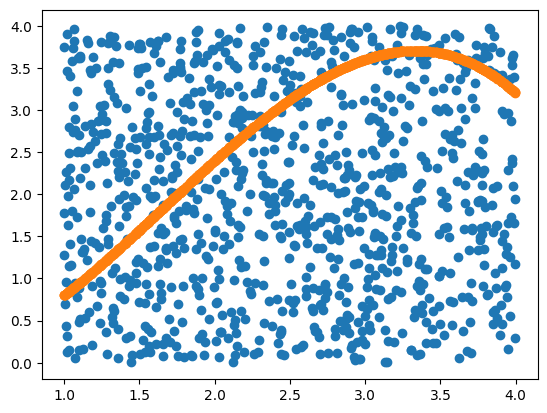

In [27]:
import matplotlib.pyplot as plt
plt.plot(pts_x,pts_y, 'o')
plt.plot(pts_x, 1/5 * pts_x**2 * (5-pts_x), 'o')

## Using `Numpy` and `Scipy`

### Differentiation

There are two main tools built into the `numpy` and `scipy` libraries that do numerical differentiation. In `numpy` there is the `np.diff()` command. In `scipy` there is the `scipy.misc.derivative()` command.

In [ ]:
# ex 1
myList = np.arange(0,10)
print(myList)
print( np.diff(myList) )

In [ ]:
# ex 2
myList = np.linspace(0,1,6)
print(myList)
print( np.diff(myList) )

In [ ]:
# ex 3
x = np.linspace(0,1,6)
dx = x[1]-x[0]
y = x**2
dy = 2*x
print("function values: \n",y)
print("exact values of derivative: \n",dy)
print("values from np.diff(): \n",np.diff(y))
print("values from np.diff()/dx: \n",np.diff(y) / dx )

Q: Why does the `np.diff()` command produce a list that is one element shorter than the original list?

In [ ]:
# what does this code do?
x = np.linspace(0,1,6)
dx = x[1]-x[0]
y = x**2
print( np.diff(y,2) / dx**2 )

Next we look into the `scipy.misc.derivative()` command from the `scipy` library. This will be another way to calculate the derivative of a function. One advantage will be that you can just send in a Python function (or a lambda function) without actually computing the lists of values. Examine the following Python code and fully describe what it does

In [ ]:
f = lambda x: x**2
x = np.linspace(1,5,5)
df = scipy.misc.derivative(f,x,dx = 1e-10)
print(df)

In [ ]:
f = lambda x: x**2
df = scipy.misc.derivative(f,1,dx = 1e-10) # derivative at x=1
print(df)

### Integration

In `numpy` there is a nice tool called `np.trapz()` that implements the trapezoidal rule. In the following problem you will find several examples of the `np.trapz()` command. Use these examples to determine how the command works to integrate functions.

Let's approximate

$$
\int^2_{-2} x^2\;dx
$$

In [ ]:
x = np.linspace(-2,2,100)
dx = x[1]-x[0]
y = x**2
print("Approximate integral is ",np.trapz(y)*dx)

Q: What is the actual value?

**Practice**

Pick a function and an interval for which you know the exact definite integral. Demonstrate how to use `np.trapz()` on your definite integral.

In the `scipy` library there is a more general tool called `scipy.integrate.quad()`. The term “quad” is short for “quadrature.” In numerical analysis literature rules like Simpson's rule are called quadrature rules for integration. The function `scipy.integrate.quad()` accepts a Python function (or a lambda function) and the bounds of the definite integral. It outputs an approximation of the integral along with an approximation of the error in the integral calculation. See the Python code below.

In [ ]:
f = lambda x: x**2
I = scipy.integrate.quad(f,-2,2)
print(I)

## 1-D Optimization

**Practice**

Given this box, we want to determine the value of $x$ such that the volume of this box is maximized. How do we proceed?


<img src="https://numericalmethodssullivan.github.io/images/Ch03_CardboardBox.png">

**Practice**

If you were blind folded and standing on a crater on the moon could you find the lowest point? How would you do it? Remember that you can hop as far as you like ... because gravity ... but sometimes that's not a great thing because you could hop too far.
